<a href="https://colab.research.google.com/github/chimenjoku/Footballdata/blob/main/footballdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsbombpy
!pip install mplsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 1.2 MB/s 
     |████████████████████████████████| 152 kB 3.5 MB/s 
     |████████████████████████████████| 127 kB 25.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 1.8 MB/s 


In [2]:
import seaborn as sns
import pandas as pd

In [3]:
from statsbombpy import sb
import matplotlib.pyplot as plt

In [4]:
sb.competitions()

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-08-14T16:57:15.866765,2021-06-13T16:17:31.694,None,2022-08-14T16:57:15.866765
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-02-12T16:13:49.294747,2021-06-13T16:17:31.694,None,2022-02-12T16:13:49.294747


In [5]:
sb.matches(competition_id=2, season_id=44)

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated,last_updated_360,match_week,competition_stage,stadium,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3749052,2004-02-07,16:00:00.000,England - Premier League,2003/2004,Wolverhampton Wanderers,Arsenal,1,3,available,...,2020-07-29T05:00,2021-06-13T16:17:31.694,2,Regular Season,Molineux Stadium,Dave Jones,Arsène Wenger,1.1.0,2,2
1,3749522,2003-12-26,13:00:00.000,England - Premier League,2003/2004,Arsenal,Wolverhampton Wanderers,3,0,available,...,2020-07-29T05:00,2021-06-13T16:17:31.694,18,Regular Season,Highbury Stadium,Arsène Wenger,Dave Jones,1.1.0,2,2
2,3749246,2004-03-28,17:05:00.000,England - Premier League,2003/2004,Arsenal,Manchester United,1,1,available,...,2020-07-29T05:00,2021-06-13T16:17:31.694,30,Regular Season,Highbury Stadium,Arsène Wenger,Alex Ferguson,1.1.0,2,2
3,3749257,2004-05-15,16:00:00.000,England - Premier League,2003/2004,Arsenal,Leicester City,2,1,available,...,2020-08-30T08:12:14.579037,2021-06-13T16:17:31.694,38,Regular Season,Highbury Stadium,Arsène Wenger,Micky Adams,1.1.0,2,2
4,3749642,2004-02-28,16:00:00.000,England - Premier League,2003/2004,Arsenal,Charlton Athletic,2,1,available,...,2020-07-29T05:00,2021-06-13T16:17:31.694,27,Regular Season,Highbury Stadium,Arsène Wenger,Alan Curbishley,1.1.0,2,2
5,3749358,2003-08-24,17:05:00.000,England - Premier League,2003/2004,Middlesbrough,Arsenal,0,4,available,...,2020-07-29T05:00,2021-06-13T16:17:31.694,1,Regular Season,Riverside Stadium,Steve McClaren,Arsène Wenger,1.1.0,2,2
6,3749346,2003-11-01,16:00:00.000,England - Premier League,2003/2004,Leeds United,Arsenal,1,4,available,...,2020-07-29T05:00,2021-06-13T16:17:31.694,1,Regular Season,Elland Road,Peter Reid,Arsène Wenger,1.1.0,2,2
7,3749253,2003-10-04,13:30:00.000,England - Premier League,2003/2004,Liverpool,Arsenal,1,2,available,...,2020-07-29T05:00,2021-06-13T16:17:31.694,1,Regular Season,Anfield,,,1.1.0,2,2
8,3749079,2003-10-18,16:00:00.000,England - Premier League,2003/2004,Arsenal,Chelsea,2,1,available,...,2020-07-29T05:00,2021-06-13T16:17:31.694,9,Regular Season,Highbury Stadium,Arsène Wenger,Claudio Ranieri,1.1.0,2,2
9,3749465,2004-03-13,16:00:00.000,England - Premier League,2003/2004,Blackburn Rovers,Arsenal,0,2,available,...,2020-07-29T05:00,2021-06-13T16:17:31.694,2,Regular Season,Ewood Park,Graeme Souness,Arsène Wenger,1.1.0,2,2


In [6]:
events = sb.events(3749431)

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


In [7]:
events.columns

Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_offensive', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_punched_out', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location', 'p

In [8]:
events = events[['team', 'type','minute','location', 'pass_end_location','pass_angle', 'player', 'pass_outcome']]
events = events[events ['team'] =='Arsenal'].reset_index()

In [9]:
events.head(20)

,index,team,type,minute,location,pass_end_location,pass_angle,player,pass_outcome
0,1,Arsenal,Starting XI,0,NaN,NaN,NaN,NaN,NaN
1,3,Arsenal,Half Start,0,NaN,NaN,NaN,NaN,NaN
2,4,Arsenal,Half Start,45,NaN,NaN,NaN,NaN,NaN
3,10,Arsenal,Pass,0,"[39.1, 49.0]","[66.1, 46.3]",-0.099669,"Sulzeer Jeremiah ""Sol"" Campbell",Incomplete
4,15,Arsenal,Pass,0,"[64.3, 10.1]","[70.7, 12.1]",0.302885,Patrick Vieira,NaN
5,18,Arsenal,Pass,0,"[32.4, 51.0]","[56.6, 40.6]",-0.405889,Gilberto Aparecido da Silva,NaN
6,19,Arsenal,Pass,0,"[55.5, 41.8]","[56.3, 26.8]",-1.517513,Thierry Henry,NaN
7,20,Arsenal,Pass,0,"[56.6, 26.8]","[72.7, 40.8]",0.715744,José Antonio Reyes Calderón,Incomplete
8,23,Arsenal,Pass,1,"[26.9, 56.7]","[41.1, 72.0]",0.822669,Gilberto Aparecido da Silva,NaN
9,24,Arsenal,Pass,1,"[41.1, 72.0]","[28.4, 70.0]",-2.985395,Sylvain Wiltord,NaN


    index     team         type  minute      location pass_end_location  \
0       1  Arsenal  Starting XI       0           NaN               NaN   
1       3  Arsenal   Half Start       0           NaN               NaN   
2       4  Arsenal   Half Start      45           NaN               NaN   
3      10  Arsenal         Pass       0  [39.1, 49.0]      [66.1, 46.3]   
4      15  Arsenal         Pass       0  [64.3, 10.1]      [70.7, 12.1]   
5      18  Arsenal         Pass       0  [32.4, 51.0]      [56.6, 40.6]   
6      19  Arsenal         Pass       0  [55.5, 41.8]      [56.3, 26.8]   
7      20  Arsenal         Pass       0  [56.6, 26.8]      [72.7, 40.8]   
8      23  Arsenal         Pass       1  [26.9, 56.7]      [41.1, 72.0]   
9      24  Arsenal         Pass       1  [41.1, 72.0]      [28.4, 70.0]   
10     25  Arsenal         Pass       1  [28.4, 69.7]      [35.6, 64.8]   
11     26  Arsenal         Pass       1  [35.0, 64.5]      [27.8, 70.5]   
12     27  Arsenal       

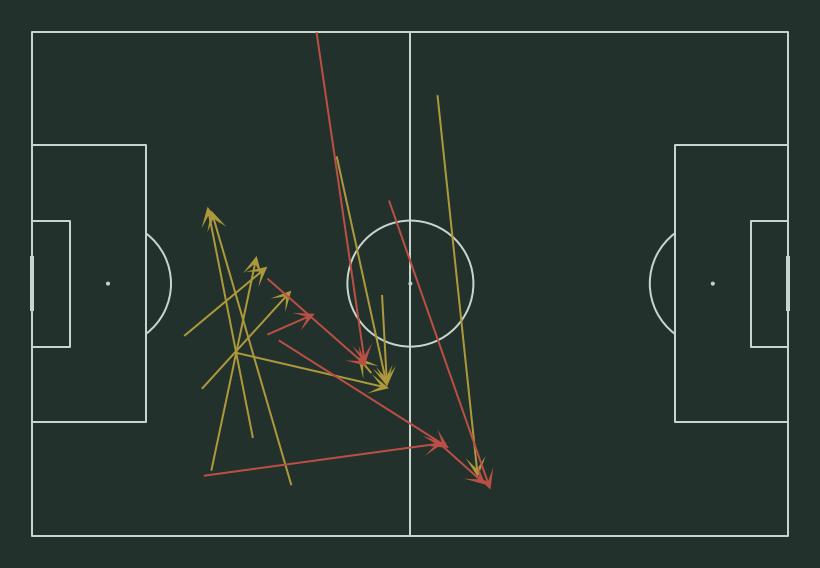

In [19]:
from mplsoccer.pitch import Pitch
df = pd.DataFrame(events.head(20))
df['location_x']=df['location'].str[0]
df['location_y']=df['location'].str[1]
#df['location_x']=df['location_x']*1.2
#df['location_y']=df['location_x']*.8
df['pass_end_location_x']=df['pass_end_location'].str[0]
df['pass_end_location_y']=df['pass_end_location'].str[1]
#df['pass_end_location_x']=df['pass_end_location_x']*1.2
#df['pass_end_location_y']=df['pass_end_location_y']*.8

mask_complete = df.pass_outcome.isnull()

#this is how we create the pitch
pitch = Pitch(pitch_type='statsbomb',pitch_color='#22312b', line_color='#c7d5cc')
fig,ax = pitch.draw(figsize=(13, 8), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
#plt.gca().invert_yaxis()

print(df)

print(df['location_x'][4])
print(df['pass_end_location_x'][4])
print(df['location_y'][4])
print(df['pass_end_location_y'][4])

# Plot the completed passes
pitch.arrows(df[mask_complete]['location_x'], df[mask_complete]['location_y'],
             df[mask_complete]['pass_end_location_x'], df[mask_complete]['pass_end_location_x'], width=2,
             headwidth=10, headlength=10, color='#ad993c', ax=ax, label='completed passes')

# Plot the completed passes
pitch.arrows(df[~mask_complete]['location_x'], df[~mask_complete]['location_y'],
             df[~mask_complete]['pass_end_location_x'], df[~mask_complete]['pass_end_location_x'], width=2,
             headwidth=10, headlength=10, color='#ba4f45', ax=ax, label='other passes')

